# Análise dos dados socioeconômicos e complementares dos discentes da UFRN

Primeiro iremos importar as bibliotecas/pacotes que iremos utilizar durante a execução desse notebook.

In [65]:
import re
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import numpy as np

Agora iremos criar uma variável chamada **dfs** que conterá os dataframes com os dados socioeconômicos e complementares dos discentes da UFRN.

In [4]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Arquivos da pasta de datasets
files = listdir('data')

# Filtro aplicado, lista de arquivos que satisfazem o regex
files_filter = {
    'socioeconomicos': list(filter(re.compile(r'dados-socio-economicos-20[0-9]{2}').search, files)),
    'ingressantes': list(filter(re.compile(r'discentes-20[0-9]{2}.csv').search, files))
}

# Variável com os dataframes que iremos usar
dfs = {
    'socioeconomicos': make_df(files_filter['socioeconomicos']),
    'complementares': pd.read_csv('data/dados-pessoais-discentes', sep=';'),
    'cursos': pd.read_csv('data/cursos-de-graduacao.csv', sep=';'),
    'ingressantes': make_df(files_filter['ingressantes']),
}

In [5]:
print(dfs['socioeconomicos'].info())
print(dfs['complementares'].info())
print(dfs['cursos'].info())
print(dfs['ingressantes'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160366 entries, 0 to 160365
Data columns (total 9 columns):
id_discente                          160366 non-null object
ano                                  160366 non-null int64
periodo                              160366 non-null int64
renda                                92825 non-null float64
escola_ens_medio                     92825 non-null object
possui_bolsa_pesquisa                160366 non-null object
possui_auxilio_alimentacao           160366 non-null object
possui_auxilio_transporte            160366 non-null object
possui_auxilio_residencia_moradia    160366 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 11.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372148 entries, 0 to 372147
Data columns (total 14 columns):
id_discente         372148 non-null object
sexo                372148 non-null object
data_nascimento     371427 non-null object
raca                372068 non-null object
es

## Análises
Iremos realizar as seguintes análises:
- Classes sociais por período de matrícula

### Classes sociais por período de matrícula
Para a elaboração da coluna **classe**, iremos utilizar a coluna de **renda** junto aos critérios de classificação econômica presente no site da [ABEP](http://www.abep.org/criterio-brasil).

In [52]:
# Limites de renda
bins = [0, 768, 1625, 2705, 4852, 9254, dfs['socioeconomicos']['renda'].max()]

# Labels
labels = ["D", "C2", "C1", "B2", "B1", "A"]

# Criamos a coluna classe
dfs['socioeconomicos']['classe'] = pd.cut(
    dfs['socioeconomicos']['renda'], bins, 
    labels=["D", "C2", "C1", "B2", "B1", "A"], 
    include_lowest=True
)

# Ano periodo
dfs['socioeconomicos']['ano_periodo'] = dfs['socioeconomicos'].ano.astype(str).str.cat(
    dfs['socioeconomicos'].periodo.astype(str), sep='-'
)

In [7]:
dfs['socioeconomicos'].head()

,id_discente,ano,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,classe,ano_periodo
0,825312813b1a17de107a020b565b72d0,2015,1,202.0,Todo em escola particular,f,t,f,f,D,2015-1
1,149560a4d0e7b585febc5a4c2bae1410,2015,1,3500.0,Todo em escola particular,f,f,t,f,B2,2015-1
2,909b29d77b69ba8f3eb5f04434845c3e,2015,1,4000.0,Todo em escola publica,f,f,f,f,B2,2015-1
3,a975fe54fb5f07a01fad54e3b2e61808,2015,1,1457.0,Todo em escola publica,f,t,f,t,C2,2015-1
4,f318ca81231a8e38a11093471e7990ae,2015,1,9000.0,Todo em escola publica,f,f,f,f,B1,2015-1


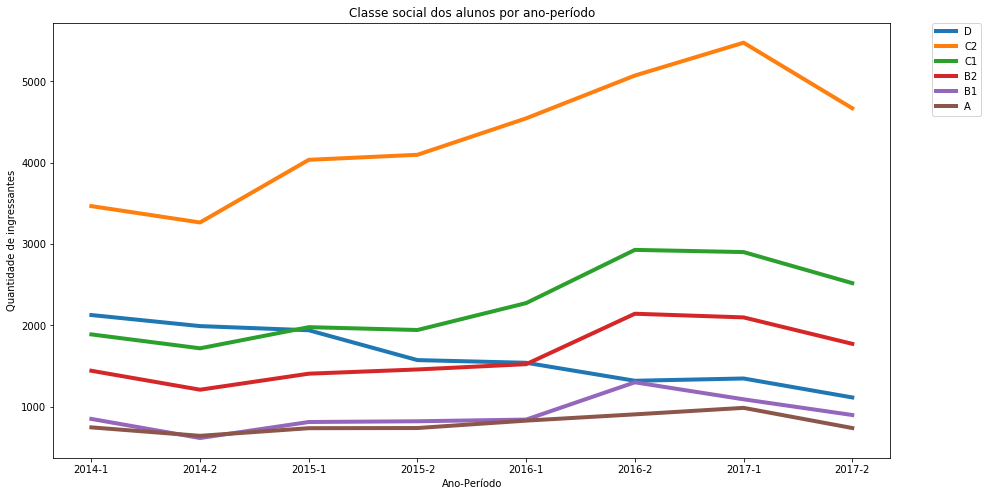

In [103]:
# DataFrame para o gráfico (filtro de 2014 - 2017)
df_graph_classe = dfs['socioeconomicos'][np.logical_and(
    dfs['socioeconomicos']['ano'] > 2013, dfs['socioeconomicos']['ano'] < 2018
)]

# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Linhas do gráfico para cada classe
for label in labels:
    classe_count = df_graph_classe[df_graph_classe['classe'] == label].groupby('ano_periodo')['id_discente'].count()
    plt.plot(classe_count.keys(), classe_count.values, label=label, linewidth=4)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Ano-Período')
plt.ylabel('Quantidade de ingressantes')
plt.title('Classe social dos alunos por ano-período')
plt.show()